# Exploratory Data Analysis - Car Sale

## Table of Contents

#### Importing packages 

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output


## Importing Dataset

In [2]:
cs = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv",  encoding = "ISO-8859-1")     # Load the Car Sales in dataset cs

<a id=section3></a> 
### 3. Data Profiling

Review the data types and car sales data to understand the variables<br>
- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [3]:
cs.shape                                             # This will print the number of rows and comlumns of the Data Frame

(9576, 10)

In [4]:
cs.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

cs (Car Sale) dataset has __9576 rows__ and __10 columns.__

In [5]:
cs.columns                                   # This will print names of all columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [6]:
cs.head()                   # This will print the first 5 rows of the Data Frame  

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [7]:
cs.tail()               # This will print the last 5 rows of the Data Frame

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [8]:
cs.info()                             # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [9]:
cs.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


### Observations
As we can see there is huge discrepancies in _Mileage_ column of a dataset. It has value ranging from _0 to 999_. According to car manufacturer specifications car mileage ranges between _5 to 30_. So we will work on this particular segment of 0-123. For the same we need to clean the data and remove the outliers.We have done this in __section 4.3__.

In [10]:
cs.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

From the above output we can see that the __EngV__ and __Drive__ columns contains __maximum NULL values__.

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [12]:
profile = pandas_profiling.ProfileReport(cs)
profile.to_file(outputfile="carsale_before_preprofiling.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __carsale_before_preprofiling.html__. <br/>
Now we will process our data to better understand it.


### 3.3 Initial Observations:
- There are about 113 duplicate records, delete them.


In [11]:
cs.drop_duplicates(subset=None,keep='first',inplace=False)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.000,crossover,68,2.50,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.000,sedan,173,1.80,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.000,other,135,5.50,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.80,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.000,crossover,83,2.00,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.00,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185,1.50,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.000,sedan,146,1.80,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.000,sedan,125,2.20,Diesel,yes,2010,E-Class,rear


Total number of rows initially present was _9576 - 113 (duplicate rows) = 9463 rows_ left after deleting duplicate rows

#### Initial Observations:

- <Strong>Drive</Strong> is car driving type which could have values like _front, rear or full_. For all missing values we will assign _front_ as drive type.
- <Strong>EngV</Strong> is Engine Volumn which has 434 missing values. We will replace them with mean i.e. 2.6463
- <Strong>Model</Strong> has 888 distinct values which needs to be looked at. Should remove ????. from all models which will reduce the high cardinality.
- <Strong>Mileage</Strong> has 3.6% zero values. We will replace them by average milage of a car.
- <Strong>Price</Strong> has 2.8% zero values. We will replace them by average price of a car.

#### Observation

1. Replace all missing value of __EngV__ to its median value.
2. We have assumed _front_ for missing __Drive__.

In [12]:
median_engv = cs.engV.median()
cs.engV.fillna(median_engv, inplace = True)

In [13]:
cs.drive.fillna("front",inplace = True)

As per the post profiling report file it is evident that _missing_ values from __Drive__ and __EngV__ has been fixed.

### 3.7. Final observations 

- Variables to transform prior to analysis:
 - Standardize all column headers to lower case (to prevent typos!)
 - __Mileage__: remove outliers 

### 4. Data Normalization

### 4.1. Standardize all column headers to lower case 

In [14]:
cs.columns = map(str.lower, cs.columns)
cs.dtypes

car              object
price           float64
body             object
mileage           int64
engv            float64
engtype          object
registration     object
year              int64
model            object
drive            object
dtype: object

### 4.2. Missing Data and its imputation

In [16]:
#missing data
total = cs.isnull().sum().sort_values(ascending=False)
percent = (cs.isnull().sum()/cs.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

              Total  Percent
drive             0      0.0
model             0      0.0
year              0      0.0
registration      0      0.0
engtype           0      0.0
engv              0      0.0
mileage           0      0.0
body              0      0.0
price             0      0.0
car               0      0.0


### 4.3. Outliers Treatment

For the purpose of this analysis, simply replace any __out-of-range mileage values with "NaN"__, rather than deleting the rows from the data set.  In a more detailed analysis it could be worth looking more closely at the rows with out-of-range mileage and deciding whether it makes more sense to remove them. 

__Mileage__ column has _8186 records which is having mileage greater than 35 and 348 records having zero mileage_.

In [17]:
def clean_mileage(mileage):                                                     # Create a new column "age_clean" that replaces out-of-range ages with "NaN"
    if mileage>=1 and mileage<=35:                                             # The oldest living person on record lived to be 122 years, 164 days (Jeanne Calment, 1875-1997)
        return mileage
    else:
        return np.nan
cs['mileage_clean'] = cs['mileage'].apply(clean_mileage)

print("'Mileage'")                                                          # Check out the new column and make sure it looks right
print("Minimum value: ", cs["mileage_clean"].min())
print("Maximum value: ", cs["mileage_clean"].max())
print("How many values are NaN?: ", pd.isnull(cs['mileage_clean']).sum())
print("Frequency table for mileage_clean:")
cs["mileage_clean"].value_counts().sort_index(0)

'Mileage'
Minimum value:  1.0
Maximum value:  35.0
How many values are NaN?:  8534
Frequency table for mileage_clean:


1.0     304
2.0      38
3.0      25
4.0      14
5.0      27
6.0      12
7.0      18
8.0      14
9.0      18
10.0     28
11.0     22
12.0     22
13.0      9
14.0     15
15.0     21
16.0     24
17.0     13
18.0     14
19.0     13
20.0     40
21.0     20
22.0     24
23.0     18
24.0     21
25.0     32
26.0     14
27.0     17
28.0     14
29.0     23
30.0     55
31.0     14
32.0     23
33.0     27
34.0     18
35.0     31
Name: mileage_clean, dtype: int64

## Post Pandas Profiling

In [45]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(cs)
profile.to_file(outputfile="carsales_after_preprocessing.html")

In [19]:
cs['mileage_Group'] = pd.cut(cs['mileage_clean'].dropna(),
                         [0,10,20,30,40],
                         labels=['<10','10-19','20-29','30-40'], include_lowest=True)

In [20]:
cs['Price_Group'] = pd.cut(cs['price'].dropna(),
                         [0,5000,10000,20000,40000,550000],
                         labels=['<5000','5001-10000','10001-20000','20001-40000','>40000'], include_lowest=True)

Text(0.5,1,'Mileage vs Price')

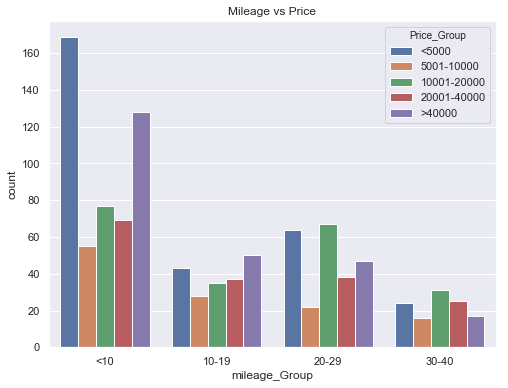

In [21]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = cs,x = 'mileage_Group', hue='Price_Group')
plt.title('Mileage vs Price')

#### Mileage distribution of the sample

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


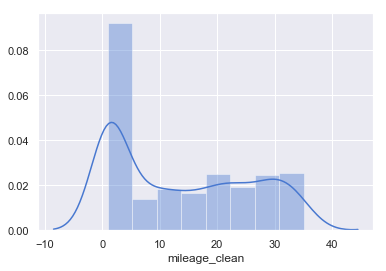

In [22]:
sns.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(cs["mileage_clean"].dropna());